In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Comparing data distributions

** We want to compare the different representations and meta-features of two distributions to characterize their similarities and differences (e.g. original data VS generated data). **

- Data format : autoML

In [2]:
data_dir = '../data'

datasets = {'iris': (data_dir + '/iris', 'iris'),
            'iris_1': (data_dir + '/iris_1', 'iris'),
            'iris_2': (data_dir + '/iris_2', 'iris'),
            'mimic': (data_dir + '/mimic', 'mimic'),
            'mimic_artif': (data_dir + '/mimic', 'mimic_artif'),
            'mushrooms': (data_dir + '/mushrooms', 'mushrooms'),
            'chems': (data_dir + '/chems', 'chems'),
            'credit': (data_dir + '/credit_data', 'credit'),
            'squares': (data_dir + '/squares', 'squares'),
            'squares_2': (data_dir + '/squares_2', 'squares')}

# First dataset.
input_dir1, basename1 = datasets['iris_1']
#input_dir1, basename1 = datasets['mimic']

# Second dataset.
input_dir2, basename2 = datasets['iris_2']
#input_dir2, basename2 = datasets['mimic_artif']

## Comparison

- ** Overall meta-features ** (descriptors): we compute simple distances between the descriptors of each dataset.
- ** Individual features/variables ** (column comparison):

    - Numerical:
        - Kolmogorov-Smirnov test
        
    - Categorical, binary:
        - Mutual information score: This is equal to the Kullback-Leibler divergence of the joint distribution with the product distribution of the marginals
        - Kullback-Leibler divergence
        - Jensen-Shannon divergence

- ** Discriminant ** (row comparison): we label the data with 0 or 1 according to their original dataset and then train a binary classifier on it. This is the method used to train GANs. More sophisticated the classifier which succeeds in separating the data is, more similar they are. If the classifier can't separate the data, maybe they are to similar, maybe the classifier isn't good enough. 
- ** Landmark: ** performance in prediction of the target among various models and metrics.
- ** Change of representations: ** we train an auto-encoder on dataset A and benchmark it on dataset B (and reciprocally). The intuition behind this is that similar data will be compressible in the same latent space. This principle could be applied to other changes of representation.
- ** Causal inference: ** comparison of causal inference results. Do we notice the same causal links between the variables?

Draft:
- Wasserstein distance (minimum cost of turning one "pile of dirt" into the other)
- Chi square
- Metrics of **privacy** and **resemblance** between two datasets:
    - Area under MDA curve with threshold
    - MMD

In [3]:
# Imports
from sys import path

# AutoML and Comparator
problem_dir = '../data_manager/'  
path.append(problem_dir)

### Read data

In [4]:
from auto_ml import AutoML
from comparator import Comparator

comparator = Comparator(AutoML(input_dir1, basename1), AutoML(input_dir2, basename2))
#df1 = AutoML.from_csv(input_dir1, basename1, 'final_df_sdv.csv')
#df2 = AutoML.from_csv(input_dir2, basename2, 'artificial_df.csv')

In [5]:
#comparator = Comparator(df1, df2)

### Visualization

### Distance between descriptors

In [6]:
#comparator.compare_descriptors(norm='euclidean')
comparator.show_descriptors()

Ratio: 0.0
Symb ratio: 0.0
Class deviation: 0.10605837573702326
Missing proba: 0.0
Skewness min: 0.29569671696231803
Skewness max: 0.48907059578926193
Skewness mean: 0.31440700865004595


### Individual features comparison

In [7]:
comparator.show_comparison_matrix()

,sepal_length,sepal_width,petal_length,petal_width
Kolmogorov-Smirnov,"(0.2, 0.8899)","(0.13333, 0.99832)","(0.26667, 0.58861)","(0.26667, 0.58861)"


### Binary classification scores

In [8]:
comparator.show_classifier_score()

from sklearn.ensemble import RandomForestClassifier
comparator.show_classifier_score(clf=RandomForestClassifier(n_estimators=200))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)




** Score: **0.5



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)




** Score: **0.46667

### Privacy/Resemblance metric
- ** MDA: ** Minimum Distance Accumulation
- Privacy: Area above curve on the left of the threshold
- Resemblance: Area under curve on the right of the threshold

DS1


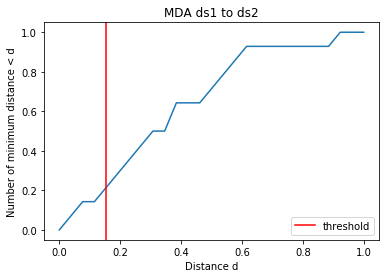

** Privacy: **0.9270833333333334

** Resemblance: **0.7435064935064933

DS2


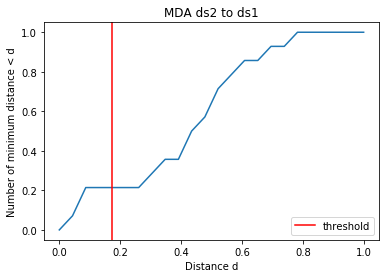

** Privacy:** 0.9002976190476191

** Resemblance:** 0.693609022556391

In [9]:
comparator.compute_mda(norm='manhattan', precision=0.1, threshold=0.4)
comparator.show_mda()

** MMD: ** Maximum Mean Discrepancy

In [ ]:
#comparator.show_mmd()
# TODO

In [ ]:
# Only if same number of samples !
#comparator.dcov()

In [ ]:
# Only if same number of samples !
# Norm = 'l0',
#        'manhattan' or 'l1', 
#        'euclidean' or 'l2',
#        'minimum',
#        'maximum',
#comparator.datasets_distance(axis=0, norm='manhattan')